# Example From asammdf issue #157

*extract_can_logging(dbc) only returns scaling of the 1st data group #157*

- https://github.com/danielhrisca/asammdf/issues/157

> I have a CAN bus log file from a logging device with 2 physical CAN channels.

> In both channels, the same J1939 CAN data frame is recorded, split by data group. This case may occur if e.g a single device is recording data from two identical machines in parallel.

> I would like to dbc-convert the raw data, but my understanding of using extract_can_logging(dbc) on the overall MDF is that it will "collapse" the original data group separation into a single data group to reflect that the two physical CAN channels are recording the same CAN ID. I would need this separated as the data would in practice not be identical.

> To do so, I assumed I would be able to split the original MDF into two MDFs, one for each data group - and then afterwards apply extract_can_logging. However, that seems to provide an empty MDF with no matches. I also notice that the structure of the resulting mdf1 and mdf2 files are slightly different vs. their counterpart data groups in the concatenated MDF.

> Perhaps I'm simply doing the splitting of data groups wrongly - if so, I'll close this asap.

- [*MatinF*](https://github.com/MatinF)

In [1]:
from asammdf import MDF
import os

Download and extract https://github.com/danielhrisca/asammdf/files/3049504/sample_files.zip

In [2]:
os.chdir("sample_files/")

In [20]:
files = ['AC6013CD_00003277_00000001.mf4', 'AC6013CD_00003277_00000005.mf4']
dbc = ['CSS-Electronics-SAE-J1939-DEMO.dbc']

mdf = MDF.concatenate(files,time_from_zero=False)

# split MDF into CAN channel 1 and 2
mdf1 = MDF(version='4.10')
mdf2 = MDF(version='4.10')

mdf1.append([mdf.get("CAN_DataFrame", group=0)])
mdf2.append([mdf.get("CAN_DataFrame", group=1)])

mdf1.save('CAN_1', overwrite=True)
mdf2.save('CAN_2', overwrite=True)

mdf0_scaled = mdf.extract_can_logging(dbc)
mdf1_scaled = mdf1.extract_can_logging(dbc)
mdf2_scaled = mdf2.extract_can_logging(dbc)

mdf0_scaled.save('mdf0_scaled.mf4')
mdf1_scaled.save('mdf1_scaled.mf4')
mdf2_scaled.save('mdf2_scaled.mf4');

# Part 2. Data Analysis.

Looking into the data from the above bug (that has since been fixed).

Exploring the data having been just given a MDF file you've never seen before.

WheelBasedVehicleSpeed


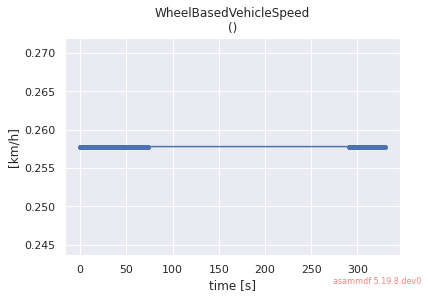

WheelBasedVehicleSpeed


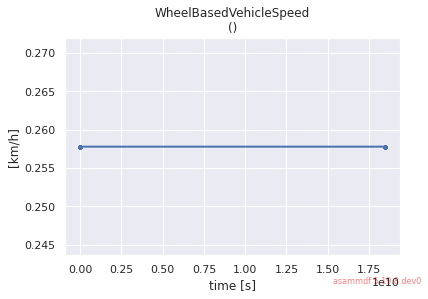

In [25]:
for channel in mdf0_scaled.iter_channels():
    print(channel.name)
    channel.plot()

Make the plots look "better" with Seaborn.

In [29]:
import matplotlib as mpl

In [30]:
import seaborn as sns
# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
mpl.rc_file_defaults()
sns.set(
    rc={
        "figure.figsize": (11.69, 8.27), # A4 paper size.
        "figure.facecolor": "w",
        "figure.edgecolor": "k",
        "axes.labelsize": 18,
        "axes.titlesize": 18,
    }
)

WheelBasedVehicleSpeed


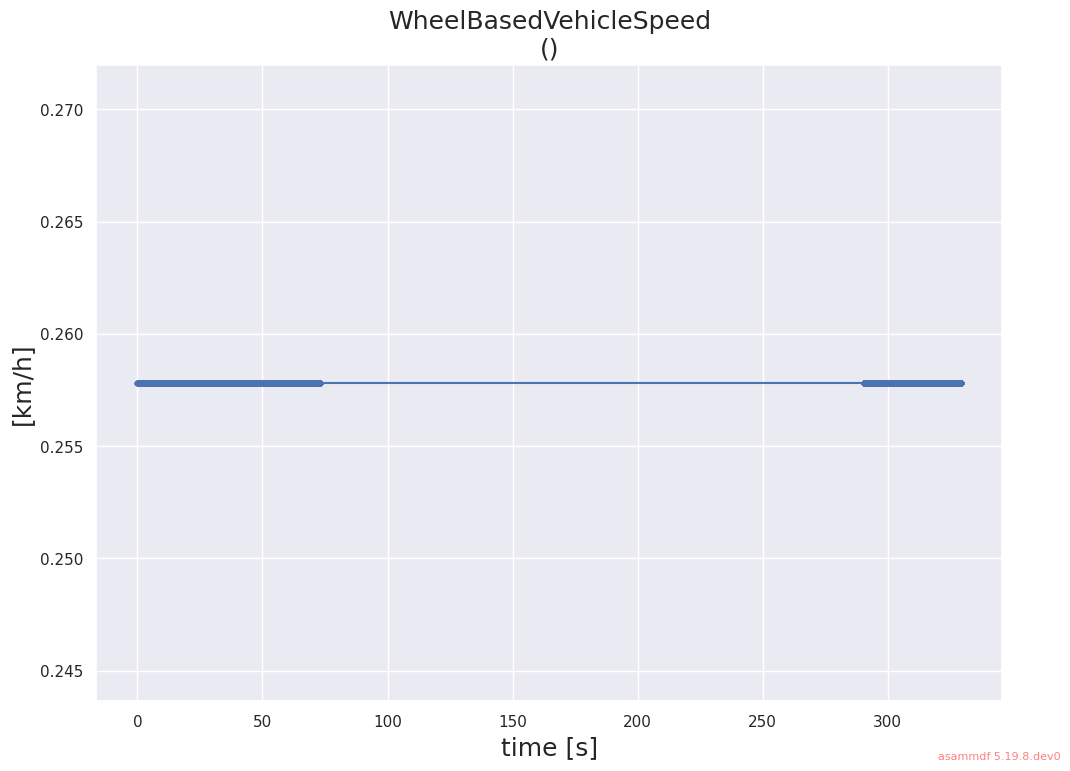

WheelBasedVehicleSpeed


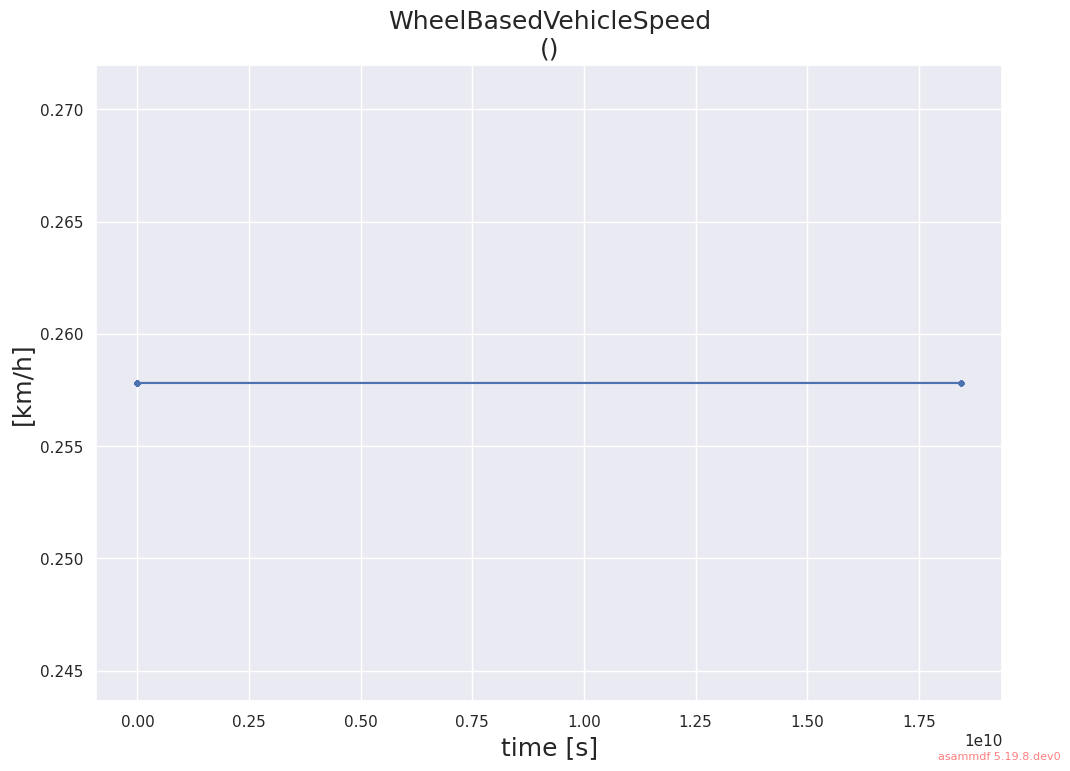

In [31]:
for channel in mdf0_scaled.iter_channels():
    print(channel.name)
    channel.plot()